# Derivatives Analytics - Introduction to Object Oriented Programming

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

**TODO**

# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports that we need to work with NumPy, Pandas and to plot data using Matplotlib functionalities

In [19]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# Introduction to dates management: `datetime` module <a name="introduction-to-dates"></a>

In [2]:
# for date management
import datetime as dt

In [ ]:
today = dt.datetime.today()
today

In [ ]:
type(today)

In [ ]:
my_birthday = dt.datetime(year=1988,month=6,day=1)
my_birthday

In [ ]:
type(my_birthday)

In [ ]:
time_to_date = today - my_birthday
time_to_date

In [ ]:
type(time_to_date)

In [ ]:
time_to_date.days

In [ ]:
time_to_date.days/365

In [ ]:
date_string = "18-04-2020"
date_string

In [ ]:
type(date_string)

In [ ]:
isinstance(date_string, str)

In [ ]:
date = dt.datetime.strptime(date_string, "%d-%m-%Y")
date

In [ ]:
type(date)

In [ ]:
isinstance(date, dt.datetime)

In [ ]:
date_string_from_dt = date.strftime("%d-%m-%Y")
date_string_from_dt

In [ ]:
type(date_string_from_dt)

In [ ]:
isinstance(date_string_from_dt, str)

In [ ]:
date + dt.timedelta(days=25)

## Non-financial Introduction to OOP <a name="non-financial-introduction-to-oop"></a>

### Without OOP: a person <a name="nonoopperson"></a> 

In [ ]:
def say_your_name(name, surname):
    print("My name is {} {}".format(name, surname))

In [ ]:
my_name = "Gabriele"
my_surname = "Pompa"

In [ ]:
say_your_name(name=my_name, surname=my_surname)

In [ ]:
def say_country_of_birth(country):
    print("My country of birth is {}".format(country))

In [ ]:
my_country = "Italy"

In [ ]:
say_country_of_birth(my_country)

In [ ]:
def compute_age(birthdate):
    
    today = dt.datetime.today()  
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    if today >= next_birthday:
        age = today.year - birthdate.year
    else:
        age = today.year - birthdate.year - 1
        
    return age

In [ ]:
my_birthdate = "01-06-1988"
my_birthdate

In [ ]:
my_age = compute_age(birthdate=my_birthdate)
my_age

In [ ]:
def time_to_birthday(birthdate):
    
    today = dt.datetime.today()
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    return (next_birthday - today).days

In [ ]:
days_to_birthday = time_to_birthday(my_birthdate)
days_to_birthday

### With OOP: the `Person` class <a name="oopperson"></a> 

In [ ]:
class Person(object):
    """
    Person class implementing some typical features of a person.
    
    Attributes:
    -----------
        name (str):                   name string;
        surname (str):                surname string;
        country (str):                country of birth;
        birthdate (str; dt.datetime): date of birth. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        age (int):                    age, as computed by compute_age() method.
    
    Methods:
    --------
        say_your_name: (returns) None
            Prints name and surname.
            
        say_country_of_birth: None
            Prints country of birth.
            
        compute_age: int
            Computes the age, sets self.age attribute and returns it.
            
        time_to_birthday: int
            Computes the number of days left untill next birthdat and return the number.
    
    """
    
    def __init__(self, p_name, p_surname, p_country, p_birthdate):
        self.name      = p_name
        self.surname   = p_surname
        self.country   = p_country
        self.birthdate = dt.datetime.strptime(p_birthdate, "%d-%m-%Y") if isinstance(p_birthdate, str) else p_birthdate
        self.age       = None
    
    def say_your_name(self):
        print("My name is {} {}".format(self.name, self.surname))
        
    def say_country_of_birth(self):
        print("My country of birth is {}".format(self.country))
        
    def compute_age(self):
    
        today = dt.datetime.today()  

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        if today >= next_birthday:
            self.age = today.year - self.birthdate.year
        else:
            self.age = today.year - self.birthdate.year - 1

        return self.age 
    
    def time_to_birthday(self):

        today = dt.datetime.today()

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        return (next_birthday - today).days

In [ ]:
gab = Person(p_name = "Gabriele", 
             p_surname = "Pompa", 
             p_country = "Italy", 
             p_birthdate = "01-06-1988")

In [ ]:
type(gab)

In [ ]:
gab.name

In [ ]:
gab.surname

In [ ]:
gab.say_your_name()

In [ ]:
gab.country

In [ ]:
gab.say_country_of_birth()

In [ ]:
gab.birthdate

In [ ]:
gab.birthdate.strftime("%d-%m-%Y")

In [ ]:
gab.age is None

In [ ]:
gab.compute_age()

In [ ]:
gab.age

In [ ]:
gab.time_to_birthday()

In [ ]:
bill = Person(p_name = "Bill", 
              p_surname = "Gates", 
              p_country = "USA", 
              p_birthdate = "28-10-1955")

In [ ]:
type(bill)

In [ ]:
bill.say_your_name()

## Introduction to OOP: Black-Scholes option pricer <a name="BS-option-pricer"></a>

### Without OOP: a call priced using Black-Scholes model <a name="nonoopperson"></a> 

In [ ]:
def call_option_payoff(S,K):
    """
    call_option_payoff(S,K) computes returns the payoff of a call option given the spot price of the underlying asset 
    and strike price 'K'.
    
    Parameters:
        S (float): spot price of the underlying asset;
        K (float): strike price;
    
    Returns:
        payoff (float): call option payoff;
    """
    return max(0.0, S - K)


In [ ]:
def call_option_price(S, K, tau, r, sigma):
    """
    call_option_price(S, K, tau, r, sigma) computes and returns the exact price of a call option 
    of time to maturity 'tau' and strike price 'K' given the spot price of the underlying asset 'S', 
    the continuosly compounded short-rate 'r' and volatility of the 
    underlying asset 'sigma'.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        sigma (float): volatility of underlying asset;
        
    Returns:
        price (float): call price;

    """
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    
    price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

    return price

In [15]:
K              = 100.0
short_rate     = 0.05 # 5% per year
volatility     = 0.2  # 20% per year

In [16]:
tau_strip = np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
tau_strip

array([0.05, 0.1 , 0.25, 0.5 , 0.75, 1.  ])

In [17]:
S_strip = np.linspace(80, 120, 100)
S_strip = np.append(S_strip, K)
S_strip = np.sort(S_strip)
S_strip

array([ 80.        ,  80.4040404 ,  80.80808081,  81.21212121,
        81.61616162,  82.02020202,  82.42424242,  82.82828283,
        83.23232323,  83.63636364,  84.04040404,  84.44444444,
        84.84848485,  85.25252525,  85.65656566,  86.06060606,
        86.46464646,  86.86868687,  87.27272727,  87.67676768,
        88.08080808,  88.48484848,  88.88888889,  89.29292929,
        89.6969697 ,  90.1010101 ,  90.50505051,  90.90909091,
        91.31313131,  91.71717172,  92.12121212,  92.52525253,
        92.92929293,  93.33333333,  93.73737374,  94.14141414,
        94.54545455,  94.94949495,  95.35353535,  95.75757576,
        96.16161616,  96.56565657,  96.96969697,  97.37373737,
        97.77777778,  98.18181818,  98.58585859,  98.98989899,
        99.39393939,  99.7979798 , 100.        , 100.2020202 ,
       100.60606061, 101.01010101, 101.41414141, 101.81818182,
       102.22222222, 102.62626263, 103.03030303, 103.43434343,
       103.83838384, 104.24242424, 104.64646465, 105.05

In [ ]:
# color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(tau_strip)+1)))

# define the figure
fig, ax = plt.subplots(figsize=(10,6))

# plot a dot to highlight the strike position
ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

# plot the red payoff line for different strikes
ax.plot(S_strip, [call_option_payoff(S, K) for S in S_strip], 
        'r-', lw=1.5, label="$max(S-K)$")

# plot the price for different strikes, one line for each different time to maturity 
for tau in tau_strip:
    ax.plot(S_strip, [call_option_price(S, K, tau, short_rate, volatility) for S in S_strip], 
            '-', lw=1.5, label=r"$\tau={}$".format(tau))

# set axis labels 
ax.set_xlabel('Underlying $S$', fontsize=12) 
ax.set_ylabel('Black-Scholes Price', fontsize=12) 

# set title
ax.set_title(r"Price of a Call Option $(S, K={}, \tau, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
             format(K, short_rate*100, volatility*100), fontsize=12) 

# add the legend
ax.legend(loc='upper left', ncol=1)

# add a gride to ease visualization
plt.grid(True)

# show the plot
fig.tight_layout()
plt.show()

### With OOP: the `BSCall` class <a name="bscall"></a> 

In [ ]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------            
        time_to_maturity: float
            Computes the time to maturity and returns it.
            
        payoff: float
            Computes the payoff of the option and returns it

        price: float
            Computes the exact price of the option and returns it

    """
    
    # constructor
    def __init__(self, S_t, K, t, T, r, sigma):
        self.S     = S_t
        self.K     = K
        self.t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.tau   = self.time_to_maturity()
        self.r     = r
        self.sigma = sigma
        
    # string representation
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.S, self.K, self.t.strftime("%d-%m-%Y"), self.T.strftime("%d-%m-%Y"), self.tau, 
                       self.r*100, self.sigma*100)
      
    # time to maturity calculation
    def time_to_maturity(self):
        return (self.T - self.t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.S - self.K)

    # price calculation
    def price(self):

        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.tau) / (self.sigma * np.sqrt(self.tau))
        d2 = d1 - self.sigma * np.sqrt(self.tau)

        price = self.S * stats.norm.cdf(d1, 0.0, 1.0) - self.K * np.exp(-self.r * self.tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price    

In [ ]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [ ]:
call

In [ ]:
type(call)

In [ ]:
call.S

In [ ]:
call.K

In [ ]:
call.T

In [ ]:
call.tau

In [ ]:
call.payoff()

In [ ]:
call.price()

In [ ]:
def plotter(call_option, S_strip, tau_strip):
    """
    plotter(call_option, S_strip, tau_strip) plot call option prices for underlying and maturities in 'S_strip' and 'tau_strip',
    respectively.

    Parameters:
        call_option (CallOption): instance of CallOption class;
        S_strip (List):           list of underlying values;
        tau_strip (List):         list of times to maturity (in years);
        
    Returns:
        None;

    """
    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(tau_strip)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variables
    numS = len(S_strip)
    numTau = len(tau_strip)
    
    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")    

    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        call_option.S = S_strip[i] # reset of underlying value
        payoff[i] = call_option.payoff()

    ax.plot(S_strip, payoff, 'r-', lw=1.5, label="$max(S-K)$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau):
        
        call_option.tau = tau_strip[i]
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            call_option.S = S_strip[j] # reset of underlying value
            price[j] = call_option.price()
        
        ax.plot(S_strip, price, '-', lw=1.5, label=r"$\tau={}$".format(call_option.tau))

    # set axis labels 
    ax.set_xlabel('Underlying $S$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S, K={}, \tau, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".\
                 format(call_option.K, call_option.r, call_option.sigma), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [ ]:
plotter(call, S_strip, tau_strip)

in plotter `S` and `tau` attributes have been intentionally changed. But this might be something error prone.. name hiding

In [ ]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------            
        time_to_maturity: float
            Computes the time to maturity and returns it.
            
        payoff: float
            Computes the payoff of the option and returns it

        price: float
            Computes the exact price of the option and returns it

    """
    
    def __init__(self, S_t, K, t, T, r, sigma):
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.__S, self.__K, self.__t.strftime("%d-%m-%Y"), self.__T.strftime("%d-%m-%Y"), self.__tau, 
                       self.__r*100, self.__sigma*100)
    
    # getters
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    # setters
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity calculation
    def time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.get_S() - self.get_K())

    # price calculation
    def price(self):
        
        # some local variables retrieved to be used repeatedly
        S     = self.get_S()
        K     = self.get_K()
        tau   = self.get_tau()
        r     = self.get_r()
        sigma = self.get_sigma()

        d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
        d2 = d1 - sigma * np.sqrt(tau)

        price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price    

In [ ]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [ ]:
call

In [ ]:
type(call)

In [ ]:
call.__S

In [ ]:
call.get_S()

In [ ]:
call.set_S(105)

In [ ]:
call.get_S()

In [ ]:
call.get_t()

In [ ]:
call.get_T()

In [ ]:
call.get_tau()

In [ ]:
call.set_t("01-06-2020")

In [ ]:
call.get_t()

In [ ]:
call.__update_tau()

In [ ]:
call.get_tau() # tau gets updated automatically

In [ ]:
(call.get_T() - call.get_t()).days / 365 # consistency check

In [ ]:
call.set_tau(1.0)

In [ ]:
call.get_tau()

In [ ]:
call.__update_T()

In [ ]:
call.get_T() # expiration date gets updated automatically

In [ ]:
(call.get_T() - call.get_t()).days / 365 |# consistency check

In [ ]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [ ]:
call

In [11]:
def plotter(call_option, S_strip, tau_strip):
    """
    plotter(call_option, S_strip, tau_strip) plot call option prices for underlying and maturities in 'S_strip' and 'tau_strip',
    respectively.

    Parameters:
        call_option (CallOption): instance of CallOption class;
        S_strip (List):           list of underlying values;
        tau_strip (List):         list of times to maturity (in years);
        
    Returns:
        None;

    """
    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(tau_strip)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variables
    numS = len(S_strip)
    numTau = len(tau_strip)
    
    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")    

    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        call_option.set_S(S_strip[i]) # reset of underlying value
        payoff[i] = call_option.payoff()

    ax.plot(S_strip, payoff, 'r-', lw=1.5, label="$max(S-K)$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau):
        
        call_option.set_tau(tau_strip[i])
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            call_option.set_S(S_strip[j]) # reset of underlying value
            price[j] = call_option.price()
        
        ax.plot(S_strip, price, '-', lw=1.5, label=r"$\tau={}$".format(call_option.get_tau()))

    # set axis labels 
    ax.set_xlabel('Underlying $S$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S, K={}, \tau, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".\
                 format(call_option.get_K(), call_option.get_r(), call_option.get_sigma()), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [ ]:
plotter(call, S_strip, tau_strip)

Put options

In [3]:
class PlainVanillaOption(object):
    """
    PlainVanillaOption class implementing payoff and pricing of european call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str)                type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------   
    
        getters and setters for all attributes
        
        time_to_maturity: float
            Computes the time to maturity and returns it.
            
        payoff: float
            Computes the payoff of the option and returns it

        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    def __init__(self, option_type, S_t, K, t, T, r, sigma):

        # option type check
        if option_type not in ['call', 'put']:
            raise InvalidOptionTypeError("Option Type: {} does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.__type, self.__S, self.__K, self.__t.strftime("%d-%m-%Y"), self.__T.strftime("%d-%m-%Y"), 
                       self.__tau, self.__r*100, self.__sigma*100)
    
    # getters
    def get_type(self):
        return self.__type
    
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise InvalidOptionTypeError("Option Type: {} does not exist!".format(option_type))
        
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity calculation
    def time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return max(0.0, self.get_S() - self.get_K())
        # put case
        else:
            return max(0.0, self.get_K() - self.get_S())
        
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.call_price()
        # put case
        else:
            return self.put_price()
          
    def call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S     = self.get_S()
        K     = self.get_K()
        tau   = self.get_tau()
        r     = self.get_r()
        sigma = self.get_sigma()

        d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
        d2 = d1 - sigma * np.sqrt(tau)

        price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price
    
#    def put_price(self):
#        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
#        return self.call_price() + self.get_K() * np.exp(- self.get_r() * self.get_tau()) - self.get_S()        
    def put_price(self):
        
        # some local variables retrieved to be used repeatedly
        S     = self.get_S()
        K     = self.get_K()
        tau   = self.get_tau()
        r     = self.get_r()
        sigma = self.get_sigma()

        d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
        d2 = d1 - sigma * np.sqrt(tau)

        price = K * np.exp(-r * tau) * stats.norm.cdf(-d2, 0.0, 1.0) - S * stats.norm.cdf(-d1, 0.0, 1.0)

        return price


In [75]:
call = PlainVanillaOption(option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.0, sigma=0.2)
call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=0.0%, sigma=20.0%)

In [76]:
call.price()

2.5510134579099315

In [61]:
put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.0, sigma=0.2) #r=0.05
put

PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=0.0%, sigma=20.0%)

In [62]:
put.price()

12.551013457909924

In [63]:
put.payoff()

10.0

In [64]:
#plotter(call, S_strip, tau_strip)

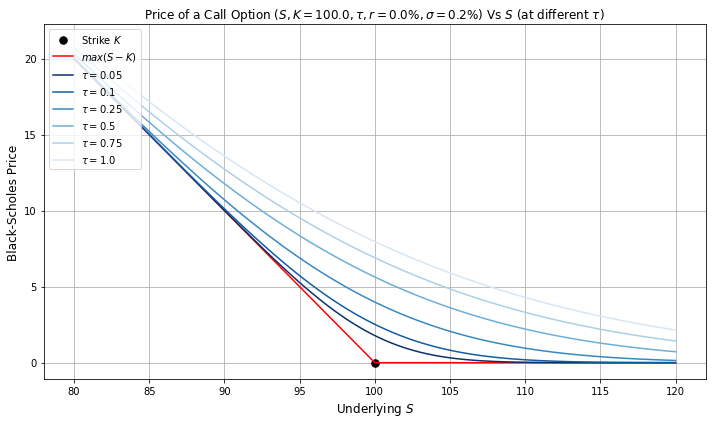

In [65]:
plotter(put, S_strip, tau_strip)

In [73]:
def plotter2(call_option, S_strip, tau_strip):
    """
    plotter(call_option, S_strip, tau_strip) plot call option prices for underlying and maturities in 'S_strip' and 'tau_strip',
    respectively.

    Parameters:
        call_option (CallOption): instance of CallOption class;
        S_strip (List):           list of underlying values;
        tau_strip (List):         list of times to maturity (in years);
        
    Returns:
        None;

    """
    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(tau_strip)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variables
    numS = len(S_strip)
    numTau = len(tau_strip)
    
    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")    

    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        call_option.set_S(S_strip[i]) # reset of underlying value
        payoff[i] = call_option.payoff()

    ax.plot(S_strip, payoff, 'r-', lw=1.5, label="$max(S-K)$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau):
        
        call_option.set_tau(tau_strip[i])
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            call_option.set_S(S_strip[j]) # reset of underlying value
            price[j] = call_option.price()
        
        ax.plot(S_strip, price, '-', lw=1.5, label=r"$\tau={}$".format(call_option.get_tau()))

        if call_option.get_type() == 'call':
            # limit call
            limit = [max(S - call_option.get_K()*np.exp(-call_option.get_r() * call_option.get_tau()), 0) for S in S_strip]
            ax.plot(S_strip, limit, 
                    'k--', lw=1.5, label=r"limit $\tau={}$".format(call_option.get_tau()))

        elif call_option.get_type() == 'put':
            # limit put
            limit = [max(call_option.get_K()*np.exp(-call_option.get_r() * call_option.get_tau()) - S, 0) for S in S_strip]
            ax.plot(S_strip, limit, 
                    'k--', lw=1.5, label=r"limit $\tau={}$".format(call_option.get_tau()))

    # set axis labels 
    ax.set_xlabel('Underlying $S$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} Option $(S, K={}, \tau, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".\
                 format(call_option.get_type(), call_option.get_K(), call_option.get_r()*100, call_option.get_sigma()*100), 
                 fontsize=12) 

    # add the legend
    ax.legend(loc='upper right', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

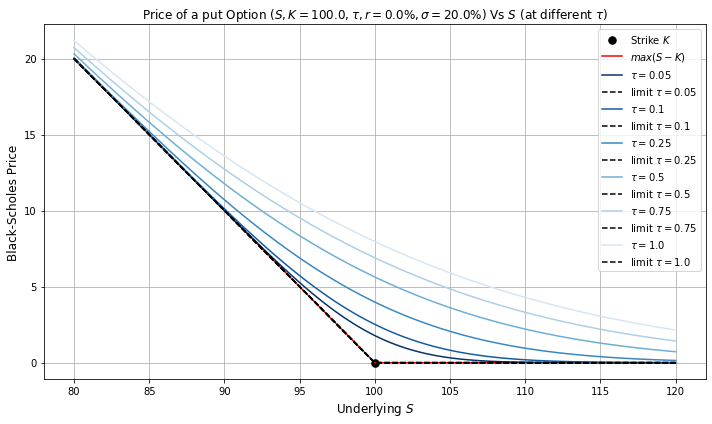

In [67]:
plotter2(put, S_strip, tau_strip)

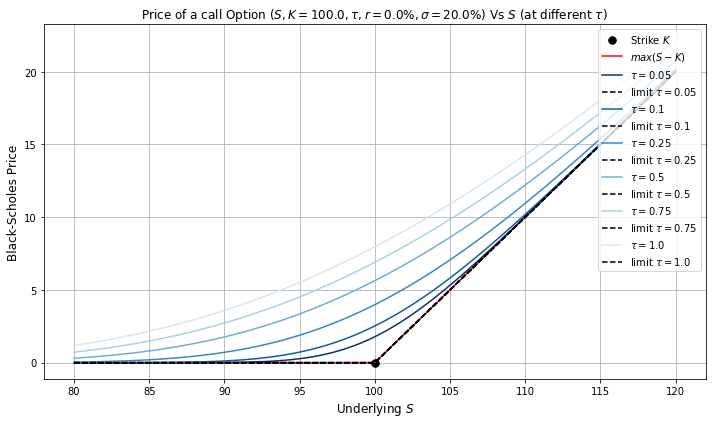

In [77]:
plotter2(call, S_strip, tau_strip)